In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("Google_Stock_Price_Train.csv")

In [3]:
df.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [4]:
df.shape

(1258, 6)

In [5]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [18]:
df.iloc[:,4:5].values.shape

(1258, 1)

In [21]:
df.shape

(1258, 6)

In [25]:
def check(df3):
    print(df.dtypes)

In [26]:
check(df)

Date       object
Open      float64
High      float64
Low       float64
Close      object
Volume     object
dtype: object


In [32]:
df["Close"][451]

'1,008.64'

In [34]:

s = '1,0.123'
f = float(s.replace(',',''))
f

10.123

In [35]:
new_df = df["Close"].apply(lambda x : float(x.replace(',','')))

In [39]:
df["Close"]=new_df.astype(float)


In [40]:
check(df)

Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume     object
dtype: object


In [56]:
df1=df.iloc[:,4:5].values
df1

array([[663.59],
       [666.45],
       [657.21],
       ...,
       [785.05],
       [782.79],
       [771.82]])

In [57]:
# we need to take min max scalar from the sciket learn to put that values to 
#the 0 to 1 range

from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler(feature_range=(0,1))
df1=scalar.fit_transform(df1)
df1

array([[0.23757287],
       [0.24151427],
       [0.22878051],
       ...,
       [0.40495845],
       [0.40184391],
       [0.38672602]])

In [63]:
from matplotlib import pyplot as plt
%matplotlib inline

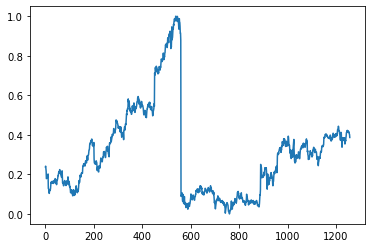

In [58]:
plt.plot(df1)

In [67]:
#converting the string to int


#df6=pd.to_numeric(df.Close)

#df6['Close'] = pd.to_numeric(df['Close'])


df['Close'] = df['Close'].str.replace('.','', regex=True).str.replace(',', '.', regex=True).astype(float)


In [ ]:
# for the time serious data we need to u


In [53]:
df1=df["Close"]

In [55]:
df1.head()

0    663.59
1    666.45
2    657.21
3    648.24
4    620.76
Name: Close, dtype: float64

In [62]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [64]:
training_size,test_size

(817, 441)

#  convert an array of values into a dataset matrix

In [65]:
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])  # over here the 100 value saved
	return numpy.array(dataX), numpy.array(dataY)

In [66]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [69]:
print("For Train: ",X_train.shape, y_train.shape)
print("For Test: ",X_test.shape, ytest.shape)


For Train:  (716, 100) (716,)
For Test:  (340, 100) (340,)


In [70]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [71]:
print("For Train: ",X_train.shape, y_train.shape)
# for lstm

For Train:  (716, 100, 1) (716,)


# Stacked LSTM model

In [72]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

2023-03-10 17:49:38.348483: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [73]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

2023-03-10 17:51:33.877987: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [74]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [75]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)


Epoch 1/100
12/12 [==============================] - 7s 187ms/step - loss: 0.0490 - val_loss: 0.0011
Epoch 2/100
12/12 [==============================] - 1s 102ms/step - loss: 0.0131 - val_loss: 0.0025
Epoch 3/100
12/12 [==============================] - 1s 101ms/step - loss: 0.0100 - val_loss: 0.0013
Epoch 4/100
12/12 [==============================] - 1s 104ms/step - loss: 0.0086 - val_loss: 9.2439e-04
Epoch 5/100
12/12 [==============================] - 1s 105ms/step - loss: 0.0075 - val_loss: 0.0012
Epoch 6/100
12/12 [==============================] - 1s 107ms/step - loss: 0.0069 - val_loss: 9.5713e-04
Epoch 7/100
12/12 [==============================] - 1s 107ms/step - loss: 0.0061 - val_loss: 0.0011
Epoch 8/100
12/12 [==============================] - 1s 108ms/step - loss: 0.0068 - val_loss: 8.1893e-04
Epoch 9/100
12/12 [==============================] - 1s 111ms/step - loss: 0.0053 - val_loss: 0.0018
Epoch 10/100
12/12 [==============================] - 1s 114ms/step - loss: 0.0

In [76]:
import tensorflow as tf

tf.__version__

'2.10.0'

In [77]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 0s 24ms/step


In [78]:
train_predict

array([[0.15392855],
       [0.14979586],
       [0.14557126],
       [0.14110047],
       [0.13588601],
       [0.12930149],
       [0.12406756],
       [0.11932603],
       [0.11696224],
       [0.11608363],
       [0.11631446],
       [0.11512412],
       [0.11229851],
       [0.10821324],
       [0.10366557],
       [0.10035273],
       [0.09934229],
       [0.10152683],
       [0.10480014],
       [0.10600625],
       [0.10624826],
       [0.10441193],
       [0.10204746],
       [0.10063305],
       [0.09943851],
       [0.10077676],
       [0.10386134],
       [0.10858227],
       [0.11491681],
       [0.11977823],
       [0.12261628],
       [0.12312019],
       [0.12050618],
       [0.11632288],
       [0.11309307],
       [0.11102398],
       [0.1102361 ],
       [0.11094187],
       [0.11439416],
       [0.12207334],
       [0.13229135],
       [0.14099115],
       [0.14697313],
       [0.15130052],
       [0.15819946],
       [0.16580597],
       [0.17256513],
       [0.177

In [80]:
train_predict=scalar.inverse_transform(train_predict)
test_predict=scalar.inverse_transform(test_predict)

In [81]:
train_predict

array([[ 602.8952 ],
       [ 599.89636],
       [ 596.8309 ],
       [ 593.58673],
       [ 589.803  ],
       [ 585.025  ],
       [ 581.2272 ],
       [ 577.78656],
       [ 576.0713 ],
       [ 575.4338 ],
       [ 575.60126],
       [ 574.73755],
       [ 572.6872 ],
       [ 569.7228 ],
       [ 566.42285],
       [ 564.019  ],
       [ 563.2857 ],
       [ 564.8709 ],
       [ 567.24615],
       [ 568.12134],
       [ 568.29694],
       [ 566.9644 ],
       [ 565.2487 ],
       [ 564.22235],
       [ 563.3556 ],
       [ 564.32666],
       [ 566.5649 ],
       [ 569.99054],
       [ 574.5871 ],
       [ 578.1147 ],
       [ 580.1741 ],
       [ 580.5397 ],
       [ 578.64294],
       [ 575.60736],
       [ 573.26373],
       [ 571.7623 ],
       [ 571.1906 ],
       [ 571.70276],
       [ 574.2078 ],
       [ 579.7801 ],
       [ 587.1946 ],
       [ 593.5074 ],
       [ 597.8481 ],
       [ 600.9882 ],
       [ 605.99426],
       [ 611.5138 ],
       [ 616.41846],
       [ 620.

# RMSE performance metrics 

## how far our prediction spread from the orginal data

In [82]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

757.401754601282

In [83]:
math.sqrt(mean_squared_error(ytest,test_predict))


723.6531119423448

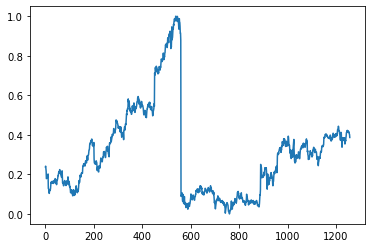

In [84]:
plt.plot(df1)

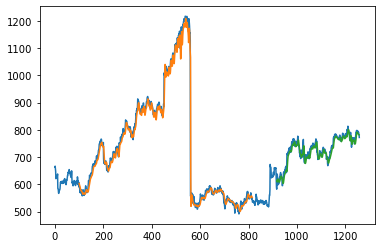

In [86]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scalar.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()